In [44]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [32]:
diarios = ['PD38032DD', 'PD04699XD']
mensuales = ['RD38085BM', 'RD38307BM']
trimestrales = ['PD37940PQ', 'PN38975BQ']
anuales = ['PM06069MA', 'PM06078MA']

all = diarios + mensual + trimestrales + anuales

In [24]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codes}/json/{begin}/{end}/ing"
d_format = '%Y-%m-d'
mq_format = '%Y-%m-d'

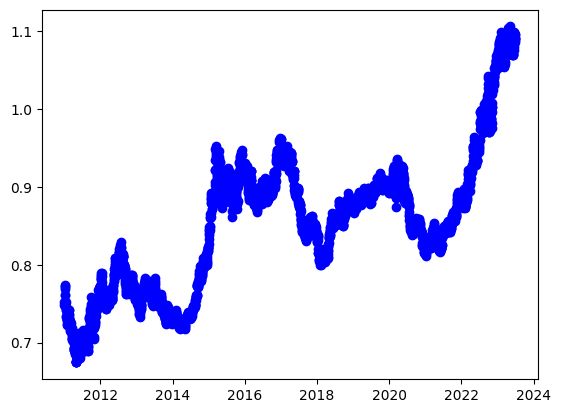

In [77]:
import pandas as pd
import requests

def obtener_datos_api_bcrp(url):
    """
    Función para descargar datos de la API del BCRP y convertirlos en un DataFrame.

    Parámetros:
        url (str): URL de la API del BCRP.

    Retorna:
        pd.DataFrame: DataFrame con los datos de la API.
    """
    # Hacer la solicitud a la API
    response = requests.get(url)
    data = response.json()

    # Extraer los nombres de las series
    series_names = [serie["name"] for serie in data["config"]["series"]]

    # Crear una lista de periodos y valores
    periods = data["periods"]

    # Convertir los datos en un DataFrame
    df = pd.DataFrame(
        [
            {"fecha": period["name"], **dict(zip(series_names, period["values"]))}
            for period in periods
        ]
    )

    # Reemplazar nombres de meses no reconocidos por pandas
    meses = {
        "Ene": "Jan", "Abr": "Apr", "Ago": "Aug", "Set": "Sep", 
        "Dic": "Dec"
    }
    for mes_es, mes_en in meses.items():
        df["fecha"] = df["fecha"].str.replace(mes_es, mes_en)

    # Convertir la columna de fecha a tipo datetime
#    df["fecha"] = pd.to_datetime(df["fecha"], format="%d.%b.%y", dayfirst=True)

    # Convertir los valores a tipo numérico
    #print(series_names)
    for serie in series_names:
        df.loc[:, serie] = pd.to_numeric(df[serie], errors='coerce')

    return df

# Ejemplo de uso
# url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD04649MD-PD04650MD/json/2011-1-1/2023-7-1/ing"
url1 = url.format(codes = "-".join(diarios), begin = '2011-1-1', end='2023-7-1')
df = obtener_datos_api_bcrp(url1)
# df["fecha"] = pd.to_datetime(df["fecha"], format="%d.%b.%y", dayfirst=True)
df["fecha"] = pd.to_datetime(df["fecha"], format="%d.%b.%y", dayfirst=True)
plt.plot(df["fecha"], df.iloc[:, 1], label=df.columns[1], marker="o", linestyle="-", color="blue") 
plt.show()
# df

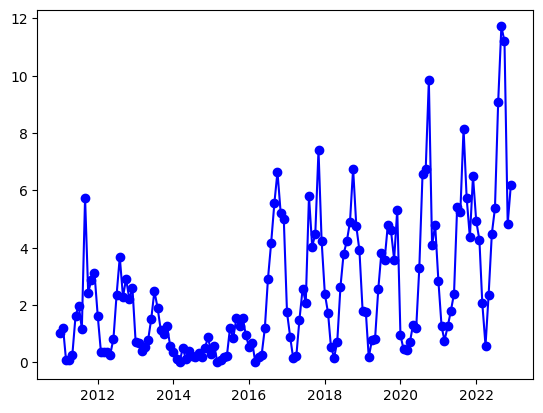

In [78]:
url3 = url.format(codes = "-".join(mensual), begin = '2011-1-1', end='2023-7-1')
df = obtener_datos_api_bcrp(url3)
df["fecha"] = pd.to_datetime(df["fecha"], format="%b.%Y")
df.head()
plt.plot(df["fecha"], df.iloc[:, 1], label=df.columns[1], marker="o", linestyle="-", color="blue") 
plt.show()

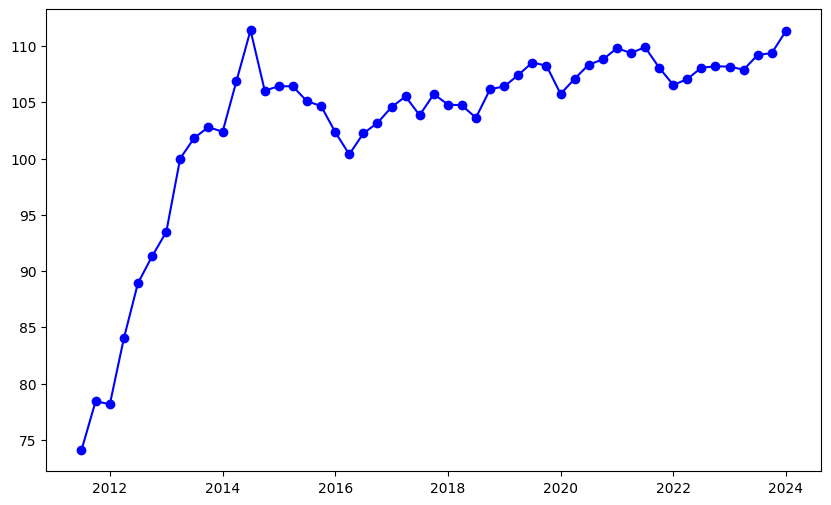

In [ ]:
url3 = url.format(codes = "-".join(trimestrales), begin = '2011-1-1', end='2023-7-1')
df = obtener_datos_api_bcrp(url3)
df["fecha"] = pd.PeriodIndex(
    df["fecha"].str.replace(r"Q(\d)\.(\d{2})", r"\2Q\1", regex=True), 
    freq="Q"
)
df.head()

import matplotlib.pyplot as plt

# Convertir la columna "fecha" al formato timestamp para el gráfico
df["fecha"] = df["fecha"].dt.to_timestamp(how="end")

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(df["fecha"], df.iloc[:, 1], label=df.columns[1], marker="o", linestyle="-", color="blue") 
plt.show()


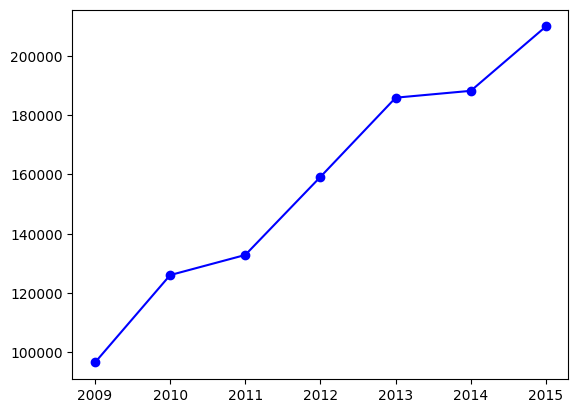

In [79]:
url2 = url.format(codes = "-".join(anuales), begin = '2011-1-1', end='2023-7-1')
df = obtener_datos_api_bcrp(url2)
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y")
df.head()
plt.plot(df["fecha"], df.iloc[:, 1], label=df.columns[1], marker="o", linestyle="-", color="blue") 
plt.show()

In [84]:
dict(
    A = "%Y",
    Q = "Q",
    M = "%b.%y",
    D = "%d.%b.%y"
)


{'A': '%Y', 'Q': 'Q', 'M': '%b.%y', 'D': '%d.%b.%y'}

In [ ]:
def obtener_datos_api_bcrp(url=url):
    """
    Función para descargar datos de la API del BCRP y convertirlos en un DataFrame.

    Parámetros:
        url (str): URL de la API del BCRP.

    Retorna:
        pd.DataFrame: DataFrame con los datos de la API.
    """
    # Hacer la solicitud a la API
    response = requests.get(url)
    data = response.json()

    # Extraer los nombres de las series
    series_names = [serie["name"] for serie in data["config"]["series"]]

    # Crear una lista de periodos y valores
    periods = data["periods"]

    # Convertir los datos en un DataFrame
    df = pd.DataFrame(
        [
            {"fecha": period["name"], **dict(zip(series_names, period["values"]))}
            for period in periods
        ]
    )

    # Reemplazar nombres de meses no reconocidos por pandas
    meses = {
        "Ene": "Jan", "Abr": "Apr", "Ago": "Aug", "Set": "Sep", 
        "Dic": "Dec"
    }
    for mes_es, mes_en in meses.items():
        df["fecha"] = df["fecha"].str.replace(mes_es, mes_en)

    # Convertir la columna de fecha a tipo datetime
#    df["fecha"] = pd.to_datetime(df["fecha"], format="%d.%b.%y", dayfirst=True)

    # Convertir los valores a tipo numérico
    #print(series_names)
    for serie in series_names:
        df.loc[:, serie] = pd.to_numeric(df[serie], errors='coerce')

    return df